In [1]:
pip install meteostat


J'initialise tout ce qu'il faut

In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2021, 9, 22)
end = datetime(2023, 9, 22)

Je crée les données pour Rennes

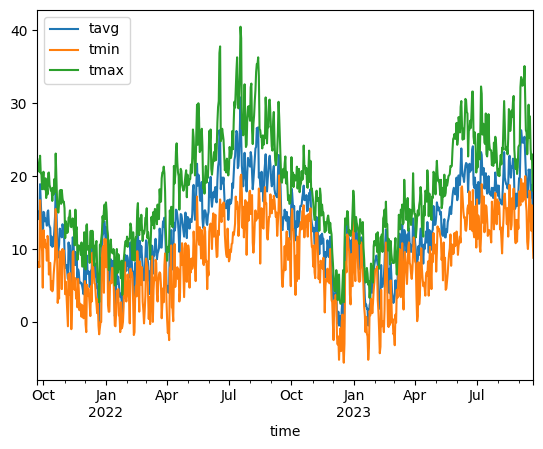

In [17]:
# Create Point for Rennes
rennes = Point(48.1123, -1.6788)

# Get  data from 2021 to 2023
data_rennes = Daily(rennes, start, end)
data_rennes = data_rennes.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

Je crée les données pour les autres villes

In [12]:
brest= Point(48.3917,-4.4886)
quimper= Point (47.9959,-4.1035)
saint_brieuc= Point (48.5144,-2.7617)
vannes= Point (47.6572, -2.7576 )

data_brest = Daily(brest, start, end)
data_brest = data_brest.fetch()

data_quimper= Daily(quimper, start, end)
data_quimper= data_quimper.fetch()

data_saint_brieuc= Daily(saint_brieuc, start, end)
data_saint_brieuc= data_saint_brieuc.fetch()

data_vannes= Daily(vannes, start, end)
data_vannes= data_vannes.fetch()

Création de la variable Localisation

In [18]:
data_rennes["Localisation"]= "Rennes"
data_brest["Localisation"]="Brest"
data_quimper["Localisation"]= "Quimper"
data_saint_brieuc["Localisation"]= "Saint-Brieuc"
data_vannes["Localisation"]="Vannes"

In [23]:
len(data_rennes)*5

3655

Maintenant, je crée une grosse base de données avec toutes les localisations !

In [26]:
import pandas as pd
merged_df = pd.concat([data_rennes,data_brest,data_quimper,data_saint_brieuc,data_vannes])
merged_df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Localisation
time,,,,,,,,,,,
2021-09-22,15.2,7.7,22.3,0.0,NaN,10.0,8.5,31.0,1027.7,NaN,Rennes
2021-09-23,14.3,7.6,21.4,0.3,NaN,326.0,9.7,33.0,1023.7,NaN,Rennes
2021-09-24,14.1,8.2,21.0,0.0,NaN,320.0,6.5,21.0,1019.5,NaN,Rennes
2021-09-25,14.6,7.5,20.6,0.3,NaN,125.0,5.8,20.4,1014.4,NaN,Rennes
2021-09-26,18.9,16.7,22.8,0.3,NaN,204.0,13.7,33.0,1014.2,NaN,Rennes
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,17.8,14.0,21.0,0.1,NaN,253.0,11.1,NaN,1009.1,NaN,Vannes
2023-09-19,16.7,12.0,20.0,0.0,NaN,231.0,12.6,NaN,1014.5,NaN,Vannes
2023-09-20,18.0,17.0,20.0,28.1,NaN,206.0,20.7,NaN,1005.4,NaN,Vannes


In [25]:
type(merged_df)

pandas.core.frame.DataFrame

Maintenant, on peut juste l'exporter

In [27]:
merged_df.to_csv("/content/meteostat_data.csv")